In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [ ]:
os.getcwd()

# Part A

In [3]:
# reading the dataset

normal=pd.read_csv('Normal.csv')

type_h=pd.read_csv('Type_H.csv')

type_s=pd.read_csv('Type_S.csv')


In [4]:


print('Normal Shape:', normal.shape)

print('Columns:', normal.columns)
print()

print('Type_H Shape:',type_h.shape)
print('Columns:', type_h.columns)
print()

print('Type_S:', type_s.shape)
print('Columns:', type_s.columns)




Normal Shape: (100, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Type_H Shape: (60, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Type_S: (150, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


<AxesSubplot:ylabel='Count'>

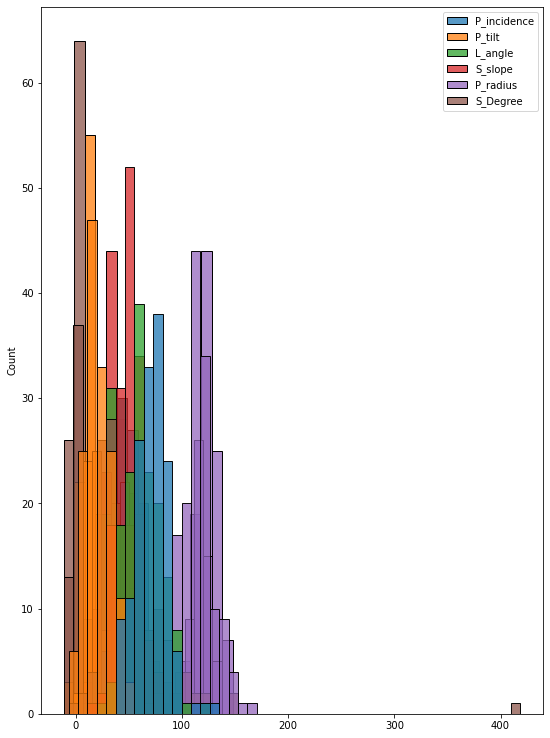

In [5]:



plt.figure(figsize=(9,13))
sns.histplot(data=normal)
sns.histplot(data=type_h)
sns.histplot(data=type_s)



In [6]:


print('Normal:\n',normal.dtypes)
print()

print('Type_H:\n', type_h.dtypes)
print()

print('Type_S:\n',type_s.dtypes)

Normal:
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Type_H:
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Type_S:
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


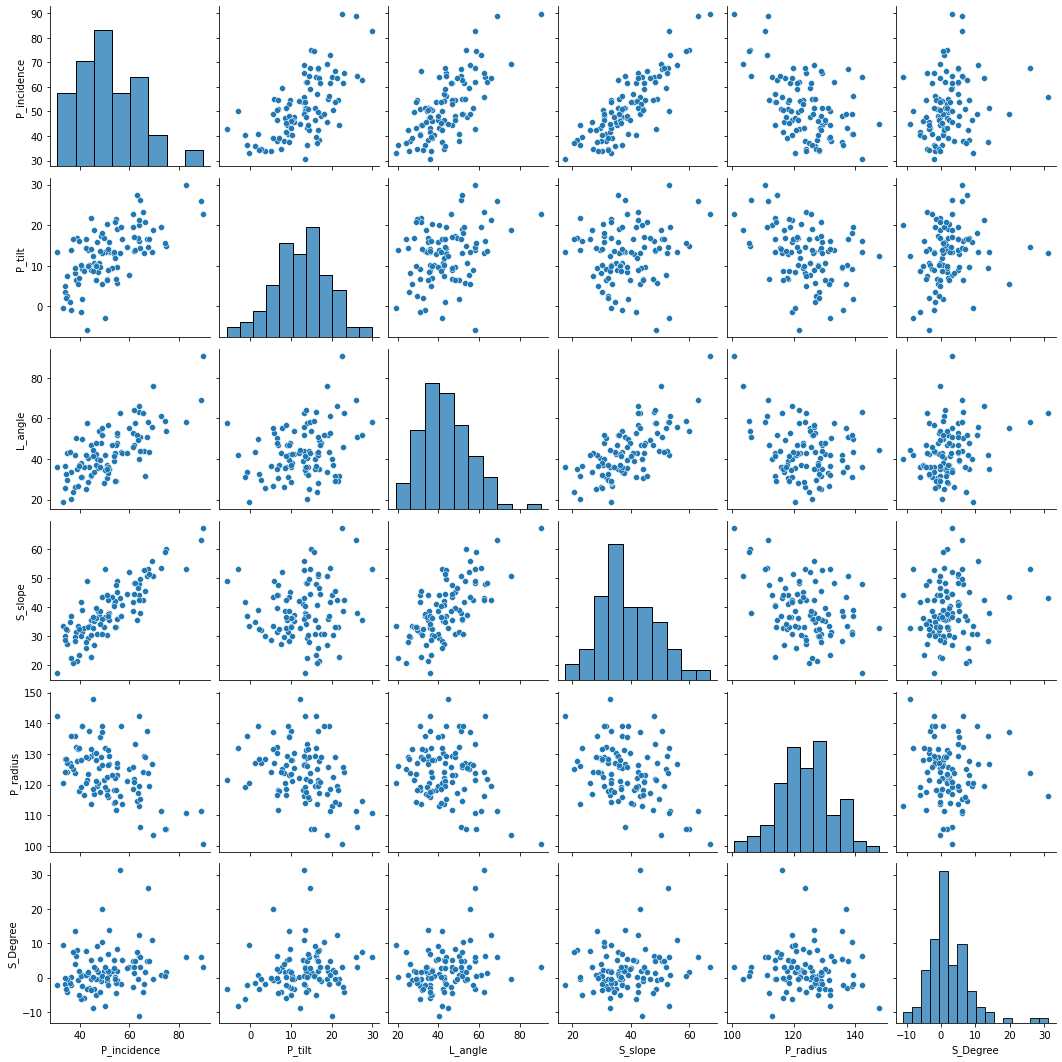

In [7]:


sns.pairplot(normal)




1. P_incidence of type_s class is high. Below that there is normal class and then type_h

2. if we take S_degree then bell curve for normal class is very sharp and narrow. Below that type_h class. For type_s its broad as compare to other 2 classes.

3. Except P_radius in all other features type_s has high value than other two class.

In [8]:



normal['Class']=normal['Class'].replace(to_replace=['Normal','Nrmal'], value='normal')
print(normal['Class'].value_counts())

print()

type_h['Class']=type_h['Class'].replace(to_replace=['Type_H'], value='type_h')
print(type_h['Class'].value_counts())

print()


type_s['Class']=type_s['Class'].replace(to_replace=['Type_S','tp_s'], value='type_s')
print(type_s['Class'].value_counts())

print()


normal    100
Name: Class, dtype: int64

type_h    60
Name: Class, dtype: int64

type_s    150
Name: Class, dtype: int64



In [9]:


main_df=pd.concat([normal,type_h,type_s])
main_df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,type_s
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,type_s
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [10]:


main_df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,normal
49,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,type_s
42,42.918041,-5.845994,58.000000,48.764035,121.606859,-3.362045,normal
39,58.521623,13.922286,41.467855,44.599337,115.514798,30.387984,type_s


In [11]:


main_df.isnull().sum()


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [12]:


five_point_summary=main_df.describe()
five_point_summary.iloc[3:]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


<AxesSubplot:>

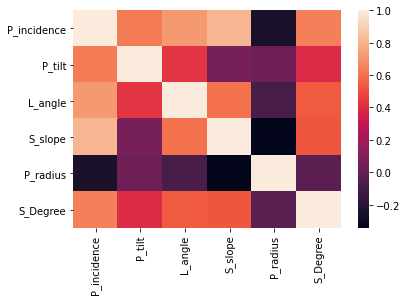

In [13]:

sns.heatmap(main_df.corr())

In [14]:

main_df.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


1. Stronger correlation is between P_incidence and S_slope i.e 0.814960


2. Weaker correlation is between P_tilt and P_radius i.e. 0.032668

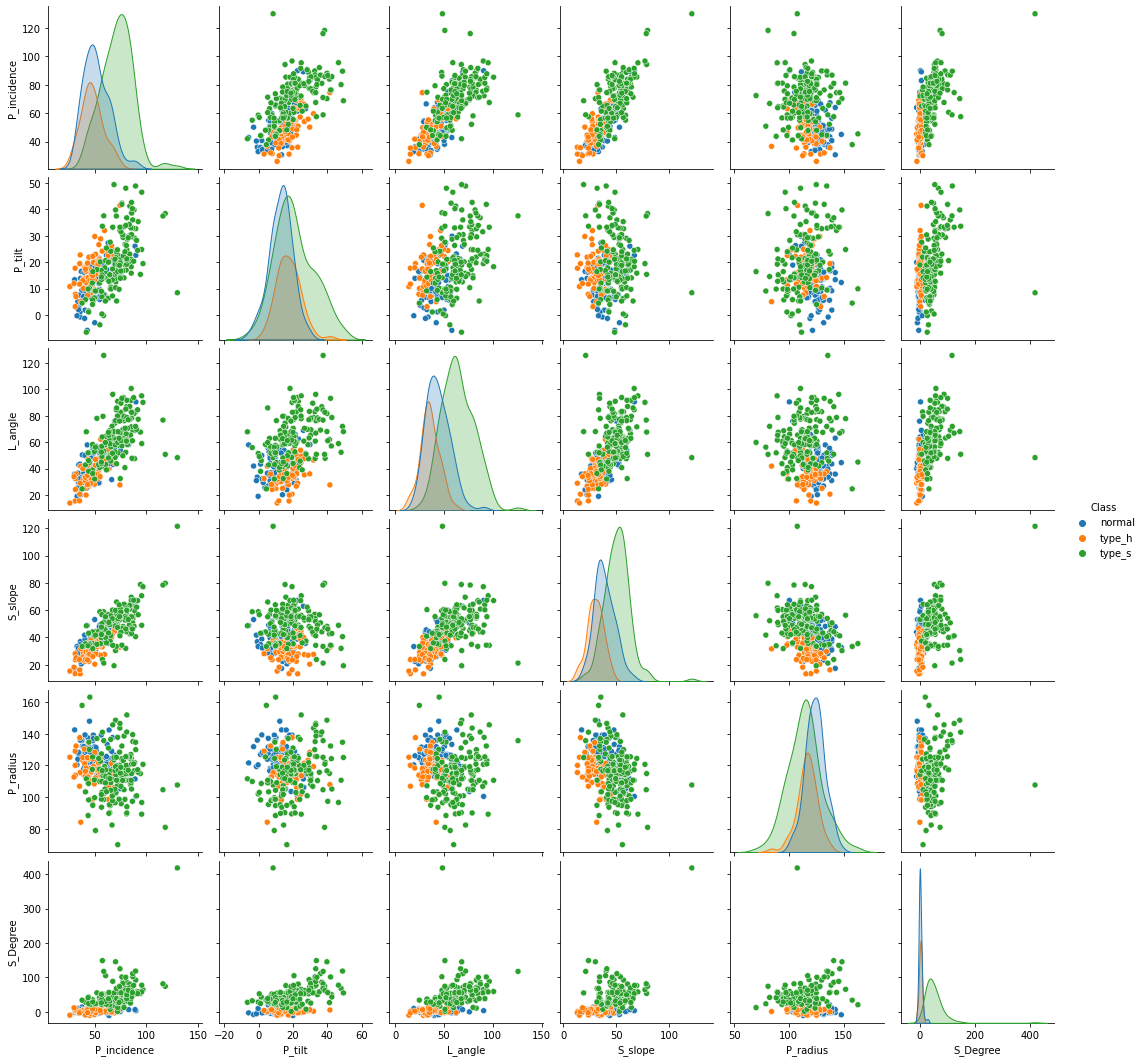

In [15]:

sns.pairplot(main_df, hue='Class')


1. P_incidence of type_s class is high. Below that there is normal class and then type_h

2. if we take S_degree then bell curve for normal class is very sharp and narrow. Below that type_h class. For type_s its broad as compare to other 2 classes.

3. Except P_radius in all other features type_s has high value than other two class.

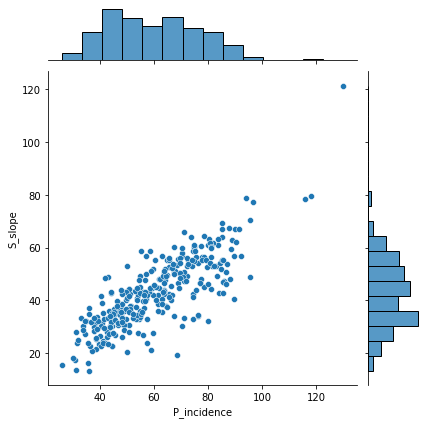

In [16]:


sns.jointplot(data=main_df, x='P_incidence', y='S_slope')

1. P_incidence and S_slope are partially dependent on each other.
2. if P_incidence increases it partially results into S_slope increases.

<AxesSubplot:xlabel='Class', ylabel='P_incidence'>

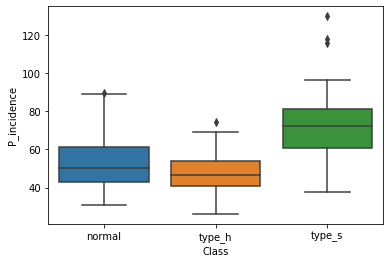

In [17]:


sns.boxplot(x='Class', y='P_incidence', data=main_df)

1. type_s has higher value then normal and at last type_h class.
2. It seems type_s has more number of outliers as compare to other two.
3. normal class is slightly right skewed
4. type_s class is slightly left skewed

In [18]:



X=main_df.iloc[:,:6]

Y=main_df['Class']

print(X)
print()

print(Y)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910
..           ...        ...        ...        ...         ...         ...
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799

[310 rows x 6 columns]

0      normal
1      normal
2      normal
3      normal
4      normal
        ...  
145

In [19]:

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=7)


In [20]:


# Base model

knn=KNeighborsClassifier()

knn.fit(X_train,Y_train)

print("Training Score:", knn.score(X_train,Y_train))

print("Testing Score:", knn.score(X_test, Y_test))

Training Score: 0.8709677419354839
Testing Score: 0.8225806451612904


Confusion matrix:
         p_normal  pth  pts
normal        16    4    1
type_h         5    9    0
type_s         1    0   26


<AxesSubplot:>

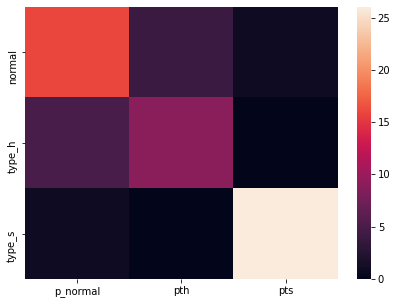

In [21]:


Y_predict=pd.DataFrame(knn.predict(X_test))

CM=metrics.confusion_matrix(Y_test, Y_predict, labels=["normal","type_h","type_s"])

df_CM=pd.DataFrame(CM, index=[i for i in["normal","type_h","type_s"]],
                  columns=[i for i in ["p_normal", "pth","pts"]])


print("Confusion matrix:\n",df_CM)
plt.figure(figsize=(7,5))
sns.heatmap(df_CM)

In [22]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict))

print("Precision Score:",metrics.precision_score(Y_test, Y_predict, average="macro"))

print("Recall Score:",metrics.recall_score(Y_test, Y_predict,average="macro"))



Accuracy: 0.8225806451612904
Precision Score: 0.7941811275144608
Recall Score: 0.7892416225749558


In [23]:


# Expereiments using different parameters

#KNN1 model

knn1=KNeighborsClassifier(weights='uniform',n_neighbors=6)

knn1.fit(X_train,Y_train)

print(knn1.score(X_train,Y_train))

print(knn1.score(X_test, Y_test))

print()


##########################################################

# KNN2 Model

knn2=KNeighborsClassifier(weights='distance',n_neighbors=3)

knn2.fit(X_train,Y_train)

print(knn2.score(X_train,Y_train))

print(knn2.score(X_test, Y_test))



0.8548387096774194
0.8548387096774194

1.0
0.8548387096774194


In [24]:
scores =[]
max_value={}

for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH.fit(X_train, Y_train)
    scores.append(NNH.score(X_test, Y_test))
    max_value[k]=NNH.score(X_test, Y_test)
        
    
print(max(zip(max_value.values(),max_value.keys())))
print()

#########################################################################################

scores =[]
max_value={}

for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, Y_train)
    scores.append(NNH.score(X_test, Y_test))
    max_value[k]=NNH.score(X_test, Y_test)
        
    
print(max(zip(max_value.values(),max_value.keys())))


(0.8548387096774194, 6)

(0.8548387096774194, 3)


Confusion matrix:
         p_normal  pth  pts
normal        18    2    1
type_h         4    9    1
type_s         1    0   26

Accuracy: 0.8548387096774194
Precision Score: 0.8431206474684737
Recall Score: 0.8209876543209876


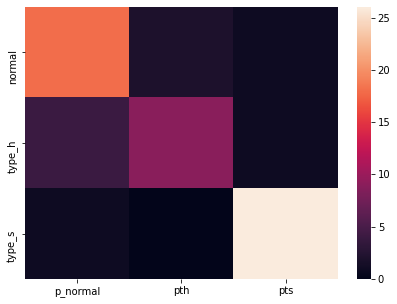

In [25]:


Y1_predict=pd.DataFrame(knn1.predict(X_test))

CM1=metrics.confusion_matrix(Y_test, Y1_predict, labels=["normal","type_h","type_s"])

df_CM1=pd.DataFrame(CM1, index=[i for i in["normal","type_h","type_s"]],
                  columns=[i for i in ["p_normal", "pth","pts"]])


print("Confusion matrix:\n",df_CM1)
plt.figure(figsize=(7,5))
sns.heatmap(df_CM1)

print()

print("Accuracy:",metrics.accuracy_score(Y_test, Y1_predict))

print("Precision Score:",metrics.precision_score(Y_test, Y1_predict, average="macro"))

print("Recall Score:",metrics.recall_score(Y_test, Y1_predict,average="macro"))



Confusion matrix:
         p_normal  pth  pts
normal        19    0    2
type_h         6    8    0
type_s         1    0   26

Accuracy: 0.8548387096774194
Precision Score: 0.8864468864468865
Recall Score: 0.8130511463844797


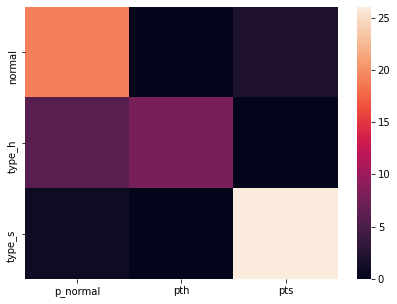

In [61]:
Y2_predict=pd.DataFrame(knn2.predict(X_test))

CM2=metrics.confusion_matrix(Y_test, Y2_predict, labels=["normal","type_h","type_s"])

df_CM2=pd.DataFrame(CM2, index=[i for i in["normal","type_h","type_s"]],
                  columns=[i for i in ["p_normal", "pth","pts"]])


print("Confusion matrix:\n",df_CM2)
plt.figure(figsize=(7,5))
sns.heatmap(df_CM2)

print()

print("Accuracy:",metrics.accuracy_score(Y_test, Y2_predict))

print("Precision Score:",metrics.precision_score(Y_test, Y2_predict, average="macro"))

print("Recall Score:",metrics.recall_score(Y_test, Y2_predict,average="macro"))


knn1 model is good compare to all others models

Confusion matrix:
         p_normal  pth  pts
normal        18    2    1
type_h         4    9    1
type_s         1    0   26

Accuracy: 0.8548387096774194
Precision Score: 0.8431206474684737
Recall Score: 0.8209876543209876


Accuracy is increased by approximately 6% from base model
Precision is increaded by approx. 5% from base model
Recall is increased by approx. 4% from base model

As well as it predicted 2 more correct normal class than base model



On the basis of above observations weights parameters impact model much than others. it changes performance metrics drastically
than others.
After that there is n_neighbors parameter who changes impact the model

# Part B


In [27]:
os.getcwd()

'C:\\Users\\vedan\\Python\\Projects'

In [28]:


missing_value=['a','?','n/a']
Data1=pd.read_csv('C:\\Users\\vedan\\Python\\Projects\\Datasets\\Data1.csv',na_values=missing_value)

Data2=pd.read_csv('C:\\Users\\vedan\\Python\\Projects\\Datasets\\Data2.csv',na_values=missing_value)

In [29]:
Data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [30]:
Data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [31]:

print('Shape of Data1:',Data1.shape)
print('\nColumns of Data1:',Data1.columns)
print("\nData types of Data1:\n",Data1.dtypes)


print('\n\nShape of Data2:',Data2.shape)
print('\nColumns of Data2:',Data2.columns)
print("\nData types of Data2:\n",Data2.dtypes)

Shape of Data1: (5000, 8)

Columns of Data1: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

Data types of Data1:
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


Shape of Data2: (5000, 7)

Columns of Data2: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

Data types of Data2:
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [32]:


new_df=pd.merge(Data1, Data2, on='ID')

new_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [33]:


convert_dt={
    'CreditCard': object,
    'InternetBanking': object,
    'FixedDepositAccount': object,
    'Security': object,
    'Level': object,
    'HiddenScore': object
}


new_df=new_df.astype(convert_dt)

new_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

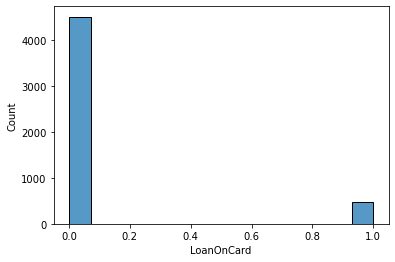

In [34]:


sns.histplot(data=new_df, x='LoanOnCard')
new_df['LoanOnCard'].value_counts()




In data we have more number of customers who don't have loan on their card

Loan On Card: 480

No Loan on Card: 4500

So these data is dominant towards no loan on card.

This is imbalanced data.

In [35]:

print(new_df.isnull().sum())



ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64


Percentage on null values except LoanOnCard is 0%.

and for LoanOnCard is: 0.4%

In [36]:
#We have 20 null values in LoanOnCard hence we have to adjust that null value by filling them with 0.0

new_df['LoanOnCard']=new_df['LoanOnCard'].fillna(0)

print(new_df.isnull().sum())

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64


In [37]:


cnt=0
for row in new_df['LoanOnCard']:
    if new_df.loc[cnt, 'LoanOnCard']!=0.0 and new_df.loc[cnt, 'LoanOnCard']!=1.0:
        new_df.loc[cnt, 'LoanOnCard']=np.nan
    cnt=cnt+1
    


In [38]:
new_df['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [39]:


x1=new_df.drop(['ID','Age','ZipCode','LoanOnCard'], axis=1)
print(x1.shape)


(5000, 10)


In [40]:
y1=new_df['LoanOnCard']
print(y1.shape)

(5000,)


In [41]:

x_train, x_test, y_train, y_test=train_test_split(x1,y1,random_state=5, test_size=0.25)


In [42]:

model=LogisticRegression(solver='liblinear')

model.fit(x_train, y_train)

print("Trainig Score:",model.score(x_train, y_train))

print("Testing Score:",model.score(x_test, y_test))

Trainig Score: 0.952
Testing Score: 0.9496


<AxesSubplot:>

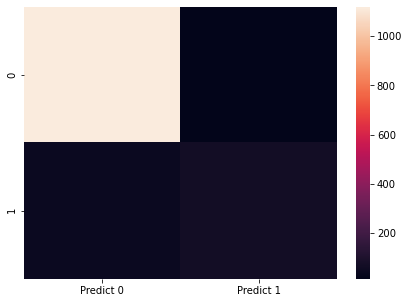

In [43]:


y_predict=pd.DataFrame(model.predict(x_test))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm=pd.DataFrame(cm, index=[i for i in["0","1"]],
                  columns=[i for i in ["Predict 0", "Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm)

In [44]:

print("Precision Score:",metrics.precision_score(y_test, y_predict))

print("Recall Score:",metrics.recall_score(y_test, y_predict))



Precision Score: 0.8214285714285714
Recall Score: 0.5897435897435898


Because of imbalanced data, dominant towards the No(0) score of recall value is low i.e TPR is less.

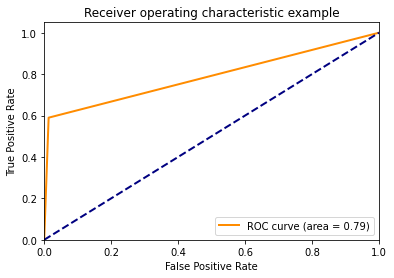

[2. 1. 0.]


In [45]:


#Before balanced

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], threshold = roc_curve(yo_test.ravel(), yo_predict.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print( threshold)

AUC curve is 0.79 which is quite good number, so model is quite good.

In [46]:

# print(new_df['LoanOnCard'].value_counts())

# print(y_train.value_counts())

# print(y_test.value_counts())

print('Distribtuion of class 0:',4520/5000*100)

print('Distribution of class 1:', 480/5000*100)



Distribtuion of class 0: 90.4
Distribution of class 1: 9.6


In [ ]:
!pip install imbalanced-learn

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
ros=RandomOverSampler(random_state=0)
x_oSample, y_oSample=ros.fit_resample(x1,y1)

y_oSample.value_counts()



0.0    4520
1.0    4520
Name: LoanOnCard, dtype: int64

In [50]:



xo_test, xo_train, yo_test, yo_train=train_test_split(x_oSample, y_oSample, test_size=0.25, random_state=5)

model.fit(xo_train, yo_train)

print("Trainig Score:",model.score(xo_train, yo_train))

print("Testing Score:",model.score(xo_test,yo_test))

Trainig Score: 0.8986725663716815
Testing Score: 0.8967551622418879


In [51]:
xo_train, xo_test, yo_train, yo_test=train_test_split(x_oSample, y_oSample, test_size=0.25, random_state=5)

model.fit(xo_train, yo_train)

print("Trainig Score:",model.score(xo_train, yo_train))

print("Testing Score:",model.score(xo_test,yo_test))

Trainig Score: 0.8986725663716815
Testing Score: 0.8995575221238938


   Predict 0  Predict 1
0       1025        120
1        107       1008


<AxesSubplot:>

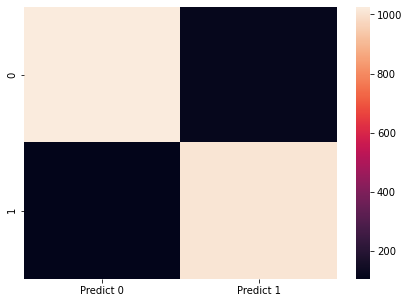

In [52]:

#After balanced

yo_predict=pd.DataFrame(model.predict(xo_test))

cmo=metrics.confusion_matrix(yo_test, yo_predict, labels=[0,1])

df_cmo=pd.DataFrame(cmo, index=[i for i in["0","1"]],
                  columns=[i for i in ["Predict 0", "Predict 1"]])


print(df_cmo)
plt.figure(figsize=(7,5))
sns.heatmap(df_cmo)



In [53]:
print('Revised Precision Score:',metrics.precision_score(yo_test,yo_predict))

print('Revised Recall Score:',metrics.recall_score(yo_test,yo_predict))


Revised Precision Score: 0.8936170212765957
Revised Recall Score: 0.9040358744394619


Precision score increased by apprx. 7%

Recall is increased by apprx. 31% 

This means model is not dominant to any one class. Model can easily survive in real world.

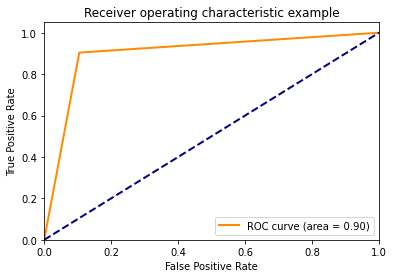

In [54]:


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, threshold = roc_curve(yo_test, yo_predict)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

AUC is also increased 11%, with this score model is good.

In [55]:


# SVM
from sklearn import svm

svm_model=svm.SVC()

svm_model.fit(xo_train,yo_train)

print("Trainig Score:(SVM)",svm_model.score(xo_train,yo_train))
print("Testing Score:(SVM)",svm_model.score(xo_test, yo_test))

print("\n")

# KNN

knn_model=KNeighborsClassifier(weights='uniform',n_neighbors=6)

knn_model.fit(xo_train,yo_train)

print("Trainig Score(KNN):",knn_model.score(xo_train,yo_train))
print("Testing Score:(KNN)",knn_model.score(xo_test,yo_test))

Trainig Score:(SVM) 0.8706489675516225
Testing Score:(SVM) 0.8734513274336283


Trainig Score(KNN): 0.9516224188790561
Testing Score:(KNN) 0.9318584070796461


In [56]:

scores =[]
max_value={}

for k in range(1,50):
    NNH1 = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH1.fit(xo_train,yo_train)
    max_value[k]=NNH1.score(xo_test,yo_test)
        
    
print(max(zip(max_value.values(),max_value.keys())))
print()

#########################################################################################

scores =[]
max_value={}

for k in range(1,50):
    NNH2 = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH2.fit(xo_train,yo_train)
    max_value[k]=NNH2.score(xo_test,yo_test)
        
    
print(max(zip(max_value.values(),max_value.keys())))

(0.9676991150442478, 1)

(0.9676991150442478, 2)


In [57]:
# Expereiments using different parameters for KNN

#KNN1 model

knn_model1=KNeighborsClassifier(weights='uniform',n_neighbors=14)

knn_model1.fit(xo_train,yo_train)

print("Trainig Score(KNN) m1:",knn_model1.score(xo_train,yo_train))

print("Testing Score(KNN) m1:",knn_model1.score(xo_test,yo_test))

print()


##########################################################

# KNN2 Model

knn_model2=KNeighborsClassifier(weights='distance',n_neighbors=9)

knn_model2.fit(xo_train,yo_train)

print("Trainig Score(KNN) m2:",knn_model2.score(xo_train,yo_train))

print("Testing Score(KNN) m2:",knn_model2.score(xo_test,yo_test))


Trainig Score(KNN) m1: 0.9050147492625369
Testing Score(KNN) m1: 0.8823008849557522

Trainig Score(KNN) m2: 1.0
Testing Score(KNN) m2: 0.9265486725663716


In [58]:
# Expereiments using different parameters for KNN
svm_model1=svm.SVC(C=1,gamma=00.1)

svm_model1.fit(xo_train,yo_train)

print("Trainig Score(SVM) m1:",svm_model1.score(xo_train,yo_train))

print("Testing Score(KNN) m1:",svm_model1.score(xo_test,yo_test))
print()

Trainig Score(SVM) m1: 0.9976401179941002
Testing Score(KNN) m1: 0.9893805309734514



svm_model1 has good model among the above experiments model

it has Trainig Score(SVM) m1: 0.9973451327433628

Testing Score(SVM) m1: 0.9893805309734514

Confusion matrix:
    Predict 0  Predict 1
0       1122         23
1          1       1114

Accuracy: 0.9893805309734514
Precision Score: 0.9894404280530775
Recall Score: 0.9895079013844557


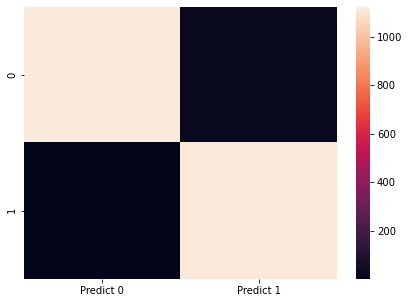

In [59]:

ykm_predict=pd.DataFrame(svm_model1.predict(xo_test))

cmk=metrics.confusion_matrix(yo_test, ykm_predict, labels=[0,1])

df_cmk=pd.DataFrame(cmk, index=[i for i in["0","1"]],
                  columns=[i for i in ["Predict 0", "Predict 1"]])


print("Confusion matrix:\n",df_cmk)
plt.figure(figsize=(7,5))
sns.heatmap(df_cmk)

print()

print("Accuracy:",metrics.accuracy_score(yo_test, ykm_predict))

print("Precision Score:",metrics.precision_score(yo_test, ykm_predict, average="macro"))

print("Recall Score:",metrics.recall_score(yo_test, ykm_predict,average="macro"))


Precision score increased by apprx. 5%

Recall is increased by apprx. 5%

Model has very performance metrics score.

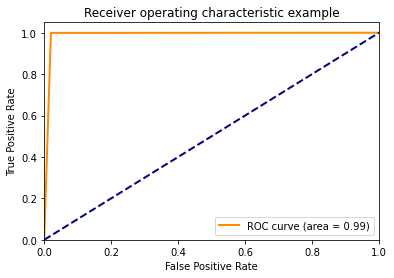

In [60]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, threshold = roc_curve(yo_test, ykm_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

AUC is also increased 4%, with this score model is good.




### Base model scores:

Revised Precision Score: 0.8967439131710179

Revised Recall Score: 0.8977973568281938

AUC is 90%.


### New Model scores:

Accuracy: 0.9412979351032449

Precision Score: 0.9413550736789451

Recall Score: 0.9413268069831946

Precision score increased by apprx. 5%

Recall is increased by apprx. 5%

AUC is also increased 4%.

Model has very performance metrics score and we can conclude that model is good and it can survive in real world.

